In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\shrik\Desktop\5th sem\FAIML\New folder\movie-recommendation-dataset-release-date.csv")


In [2]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Rating'] = imputer.fit_transform(df[['Rating']])


In [3]:
df = pd.get_dummies(df, columns=['Genres'], drop_first=True)


In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'],dayfirst=True)
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['UserID', 'MovieID', 'Title', 'Timestamp', 'Release Date'])
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset (update the path to where your CSV is stored)
df = pd.read_csv(r"C:\Users\shrik\Desktop\5th sem\FAIML\New folder\movie-dataset.csv")

# Handle missing values in the 'Rating' column
imputer = SimpleImputer(strategy='mean')
df['Rating'] = imputer.fit_transform(df[['Rating']])

# Convert Release Date into datetime and extract year and month
df['Release Date'] = pd.to_datetime(df['Release Date'], dayfirst=True)
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month

# Encode categorical data (Genres)
df = pd.get_dummies(df, columns=['Genres'], drop_first=True)

# Normalize the Ratings
scaler = MinMaxScaler()
df['Rating'] = scaler.fit_transform(df[['Rating']])

# Split the data
X = df.drop(columns=['UserID', 'MovieID', 'Title', 'Timestamp', 'Release Date'])
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the processed DataFrame and the split data shapes
print("Processed DataFrame:")
print(df)
print("\nTraining Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)




Processed DataFrame:
    MovieID              Title Release Date  UserID    Rating    Timestamp  \
0       101           Avengers   2005-05-15       1  0.428571   1104537600   
1       102          Hera pari   2010-08-21       2  0.714286   1282435200   
2       103    Laapataa Ladies   2015-11-05       3  1.000000   1446681600   
3       104             Raayan   2020-02-14       4  0.285714   1581638400   
4       105           Thalavan   1995-07-12       5  0.857143    804556800   
5       106               Kill   2024-10-12       6  0.000000   4624734478   
6       107              saaho   2020-05-03       7  0.142857  76875686841   
7       108              stree   2019-12-15       8  0.571429   5319684900   
8       109            stree 2   2024-08-04       8  1.000000    234567869   
9       110    Bhool Bhulaiyaa   2007-07-06       9  0.528571   3490556839   
10      111  Bhool Bhulaiyaa 2   2022-02-05       9  0.285714  66787325588   

    Collection(in K)  Release Year  Releas

In [7]:
df.shape

(11, 14)

In [8]:
df.columns

Index(['MovieID', 'Title', 'Release Date', 'UserID', 'Rating', 'Timestamp',
       'Collection(in K)', 'Release Year', 'Release Month', 'Genres_Comedy',
       'Genres_Drama', 'Genres_Thriller', 'Genres_action', 'Genres_horror'],
      dtype='object')

In [9]:
df["Rating"].mean()


0.5285714285714285

In [10]:
df.describe()

,MovieID,Release Date,UserID,Rating,Timestamp,Collection(in K),Release Year,Release Month
count,11.000000,11,11.000000,11.000000,1.100000e+01,10.000000,11.000000,11.000000
mean,106.000000,2015-02-28 08:43:38.181818112,5.636364,0.528571,1.486840e+10,6.600000,2014.636364,7.000000
min,101.000000,1995-07-12 00:00:00,1.000000,0.000000,2.345679e+08,2.000000,1995.000000,2.000000
25%,103.500000,2009-01-27 00:00:00,3.500000,0.285714,1.193486e+09,5.000000,2008.500000,5.000000
50%,106.000000,2019-12-15 00:00:00,6.000000,0.528571,1.581638e+09,7.000000,2019.000000,7.000000
75%,108.500000,2021-03-20 12:00:00,8.000000,0.785714,4.972210e+09,8.750000,2021.000000,9.000000
max,111.000000,2024-10-12 00:00:00,9.000000,1.000000,7.687569e+10,10.000000,2024.000000,12.000000
std,3.316625,NaN,2.838053,0.338363,2.829963e+10,2.796824,9.298094,3.316625


In [11]:
df.head()

,MovieID,Title,Release Date,UserID,Rating,Timestamp,Collection(in K),Release Year,Release Month,Genres_Comedy,Genres_Drama,Genres_Thriller,Genres_action,Genres_horror
0,101,Avengers,2005-05-15,1,0.428571,1104537600,10.0,2005,5,False,False,False,False,False
1,102,Hera pari,2010-08-21,2,0.714286,1282435200,5.0,2010,8,True,False,False,False,False
2,103,Laapataa Ladies,2015-11-05,3,1.000000,1446681600,NaN,2015,11,False,True,False,False,False
3,104,Raayan,2020-02-14,4,0.285714,1581638400,3.0,2020,2,False,False,False,False,False
4,105,Thalavan,1995-07-12,5,0.857143,804556800,7.0,1995,7,False,False,True,False,False


In [12]:
df.tail()

,MovieID,Title,Release Date,UserID,Rating,Timestamp,Collection(in K),Release Year,Release Month,Genres_Comedy,Genres_Drama,Genres_Thriller,Genres_action,Genres_horror
6,107,saaho,2020-05-03,7,0.142857,76875686841,2.0,2020,5,False,False,True,False,False
7,108,stree,2019-12-15,8,0.571429,5319684900,9.0,2019,12,True,False,False,False,False
8,109,stree 2,2024-08-04,8,1.000000,234567869,8.0,2024,8,True,False,False,False,False
9,110,Bhool Bhulaiyaa,2007-07-06,9,0.528571,3490556839,10.0,2007,7,False,False,False,False,True
10,111,Bhool Bhulaiyaa 2,2022-02-05,9,0.285714,66787325588,7.0,2022,2,False,False,False,False,True


In [13]:
df.isnull().sum() 

MovieID             0
Title               0
Release Date        0
UserID              0
Rating              0
Timestamp           0
Collection(in K)    1
Release Year        0
Release Month       0
Genres_Comedy       0
Genres_Drama        0
Genres_Thriller     0
Genres_action       0
Genres_horror       0
dtype: int64

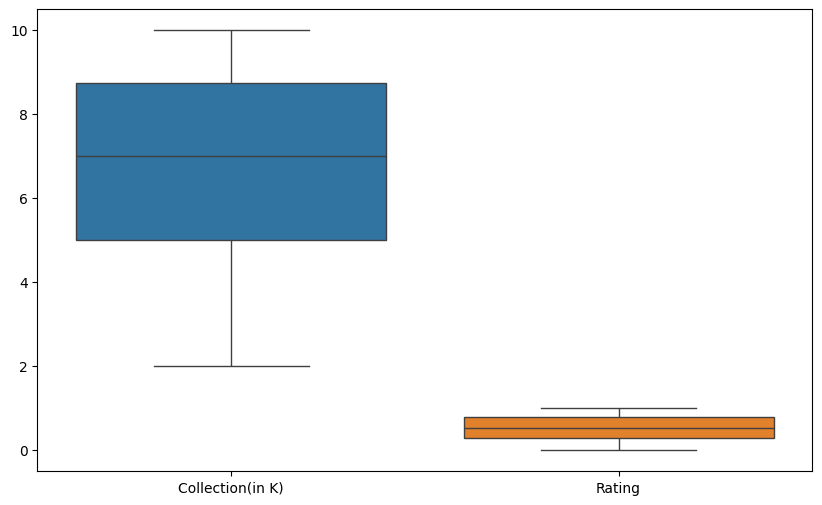

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Collection(in K)', 'Rating']])
plt.show()

Text(0.5, 1.0, 'rate')

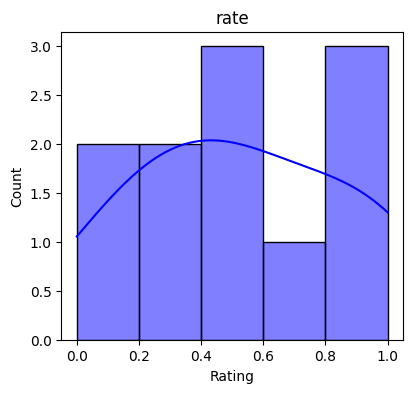

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Rating'], kde=True,color="blue")
plt.title('rate')



Text(0.5, 1.0, 'Collection')

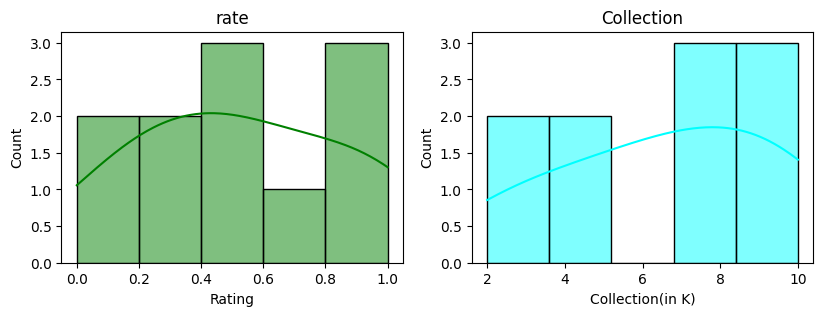

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.histplot(df['Rating'], kde=True,color="green")
plt.title('rate')

plt.subplot(1, 3, 2)
sns.histplot(df['Collection(in K)'], kde=True,color="aqua")
plt.title('Collection')


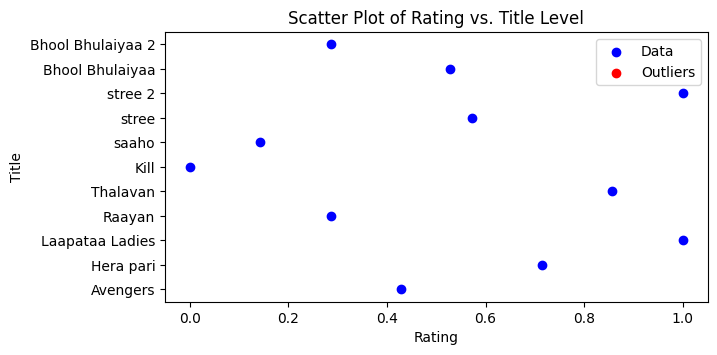

In [17]:
from scipy import stats
plt.figure(figsize=(7, 3.5))

# Plot all data points
plt.scatter(df['Rating'], df['Title'], c='blue', label='Data')

# Highlight outliers
outliers = df[(df['Rating'] > 3) | (df['Rating'] < -3) ]
plt.scatter(outliers['Rating'], outliers['Title'], c='red', label='Outliers')

plt.ylabel('Title')
plt.xlabel('Rating')
plt.title('Scatter Plot of Rating vs. Title Level')
plt.legend()
plt.show()